[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyCirclize/blob/main/docs/chord_diagram.ipynb)

In [1]:
# Colab environment requires 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pycirclize 

## 1. Chord Diagram

pyCirclize can plot a **Chord Diagram**([wiki](https://en.wikipedia.org/wiki/Chord_diagram_%28information_visualization%29)) from matrix data like [circlize](https://jokergoo.github.io/circlize_book/book/the-chorddiagram-function.html) or [Circos Table Viewer](http://mkweb.bcgsc.ca/tableviewer/).

### 1-1. Example1 (3 x 6)

This example uses the same matrix data as documented in [circlize](https://jokergoo.github.io/circlize_book/book/the-chorddiagram-function.html)

    E1  E2  E3  E4  E5  E6
S1   4  14  13  17   5   2
S2   7   1   6   8  12  15
S3   9  10   3  16  11  18


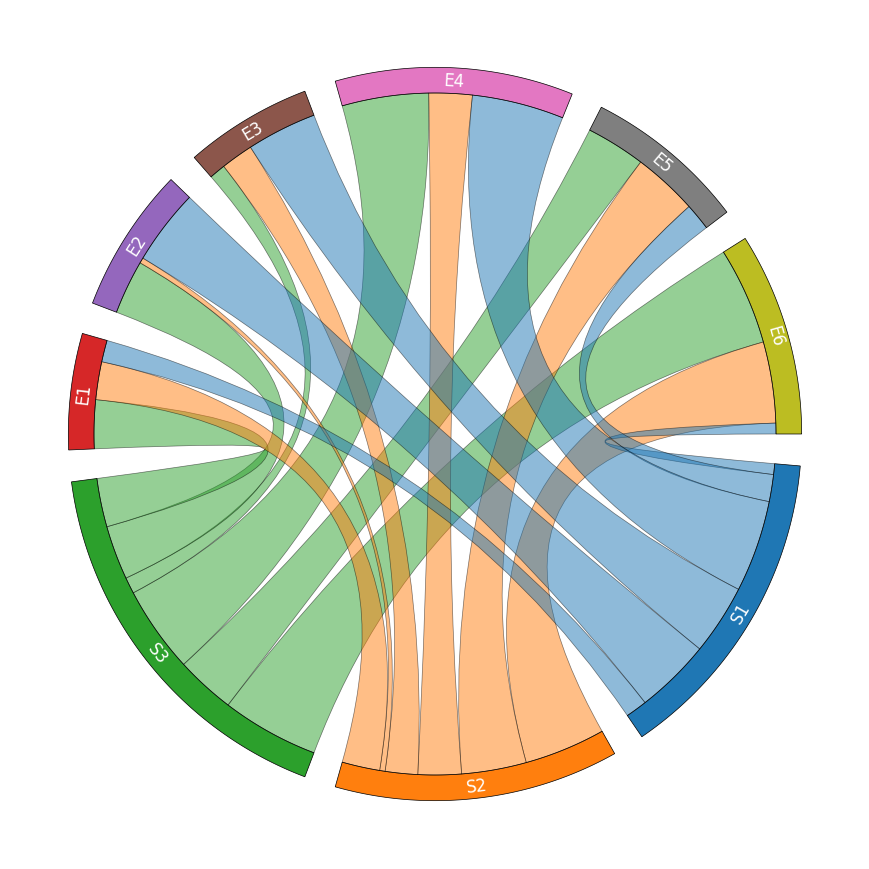

In [2]:
from pycirclize import Circos
from pycirclize.parser import Matrix
from pycirclize.utils import ColorCycler
import pandas as pd

# Create matrix dataframe (3 x 6)
row_names = ["S1", "S2", "S3"]
col_names = ["E1", "E2", "E3", "E4", "E5", "E6"]
matrix_data = [
    [4, 14, 13, 17, 5, 2],
    [7, 1, 6, 8, 12, 15],
    [9, 10, 3, 16, 11, 18],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

# Load matrix dataframe (Can also load matrix file)
matrix = Matrix(matrix_df)
ColorCycler.set_cmap("tab10")
name2color = {name: ColorCycler() for name in matrix.all_names}

# Initialize circos sectors 
circos = Circos(matrix.to_sectors(), space=5, start=-265, end=95)
for sector in circos.sectors:
    # Plot data axis & text
    track = sector.add_track((93, 100))
    color = name2color[sector.name]
    track.axis(fc=color)
    track.text(sector.name, color="white", size=12)

# Plot links
for link in matrix.to_links():
    row_name = link[0][0]
    color = name2color[row_name]
    circos.link(*link, fc=color, ec="black", lw=0.5)

print(matrix)
fig = circos.plotfig()

### 1-2. Example2 (10 x 10)

This example uses the 10 x 10 matrix data randomly generated by [Circos Table Viewer](http://mkweb.bcgsc.ca/tableviewer/)

     A    B    C    D    E    F    G    H    I    J
A   51  115   60   17  120  126  115  179  127  114
B  108  138  165  170   85  221   75  107  203   79
C  108   54   72  123   84  117  106  114   50   27
D   62  134   28  185  199  179   74   94  116  108
E  211  114   49   55  202   97   10   52   99  111
F   87    6  101  117  124  171  110   14  175  164
G  167   99  109  143   98   42   95  163  134   78
H   88   83  136   71  122   20   38  264  225  115
I  145   82   87  123  121   55   80   32   50   12
J  122  109   84   94  133   75   71  115   60  210


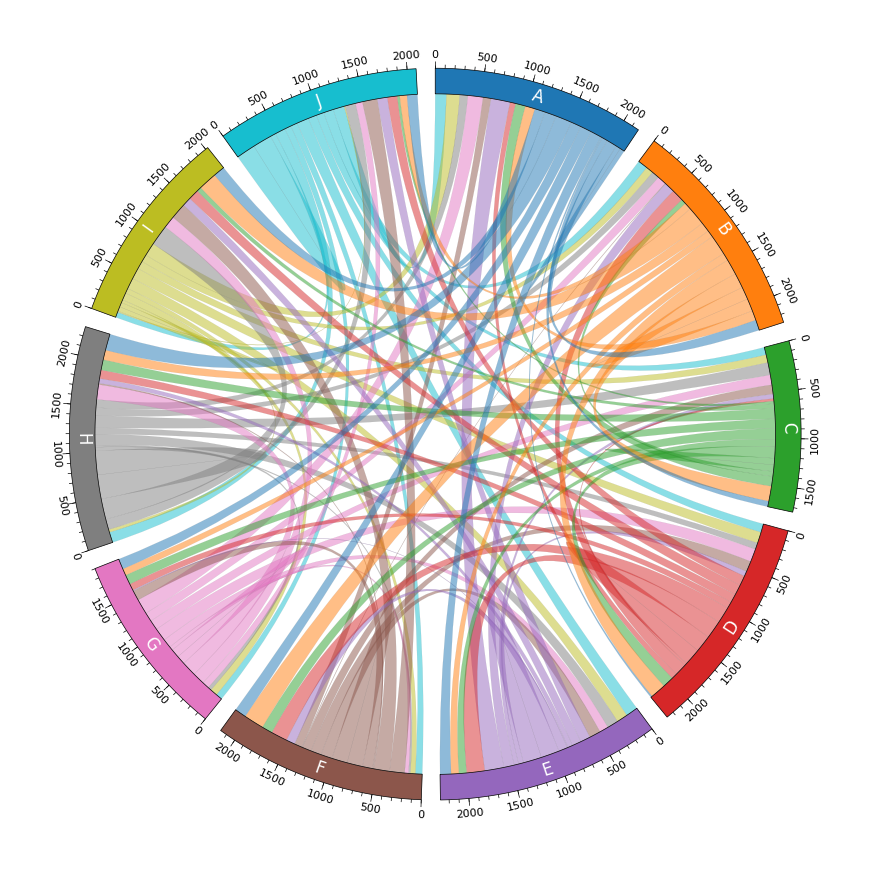

In [3]:
from pycirclize import Circos
from pycirclize.parser import Matrix
from pycirclize.utils import ColorCycler
import pandas as pd

# Create matrix data (10 x 10)
row_names = list("ABCDEFGHIJ")
col_names = row_names
matrix_data = [
    [51, 115, 60, 17, 120, 126, 115, 179, 127, 114],
    [108, 138, 165, 170, 85, 221, 75, 107, 203, 79],
    [108, 54, 72, 123, 84, 117, 106, 114, 50, 27],
    [62, 134, 28, 185, 199, 179, 74, 94, 116, 108],
    [211, 114, 49, 55, 202, 97, 10, 52, 99, 111],
    [87, 6, 101, 117, 124, 171, 110, 14, 175, 164],
    [167, 99, 109, 143, 98, 42, 95, 163, 134, 78],
    [88, 83, 136, 71, 122, 20, 38, 264, 225, 115],
    [145, 82, 87, 123, 121, 55, 80, 32, 50, 12],
    [122, 109, 84, 94, 133, 75, 71, 115, 60, 210],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

# Load matrix dataframe (Can also load matrix file)
matrix = Matrix(matrix_df)
ColorCycler.set_cmap("tab10")
name2color = {name: ColorCycler() for name in matrix.all_names}

# Initialize circos sectors 
circos = Circos(matrix.to_sectors(), space=3)
for sector in circos.sectors:
    # Plot data axis & text
    track = sector.add_track((93, 100))
    color = name2color[sector.name]
    track.axis(fc=color)
    track.text(sector.name, color="white", size=12)
    # Plot xticks
    track.xticks_by_interval(500, label_formatter=lambda v: f"{v:.0f}")
    track.xticks_by_interval(100, tick_length=1, show_label=False)

# Plot links
for link in matrix.to_links():
    row_name = link[0][0]
    color = name2color[row_name]
    circos.link(*link, fc=color)

print(matrix)
fig = circos.plotfig()

### 1-3. Example3 (10 x 2)

This example uses the 10 x 2 matrix data randomly generated by [Circos Table Viewer](http://mkweb.bcgsc.ca/tableviewer/)

     K    L
A   83   79
B   90  118
C  165   81
D  121   77
E  187  197
F  177    8
G  141  127
H   29   27
I   95   82
J  107   39


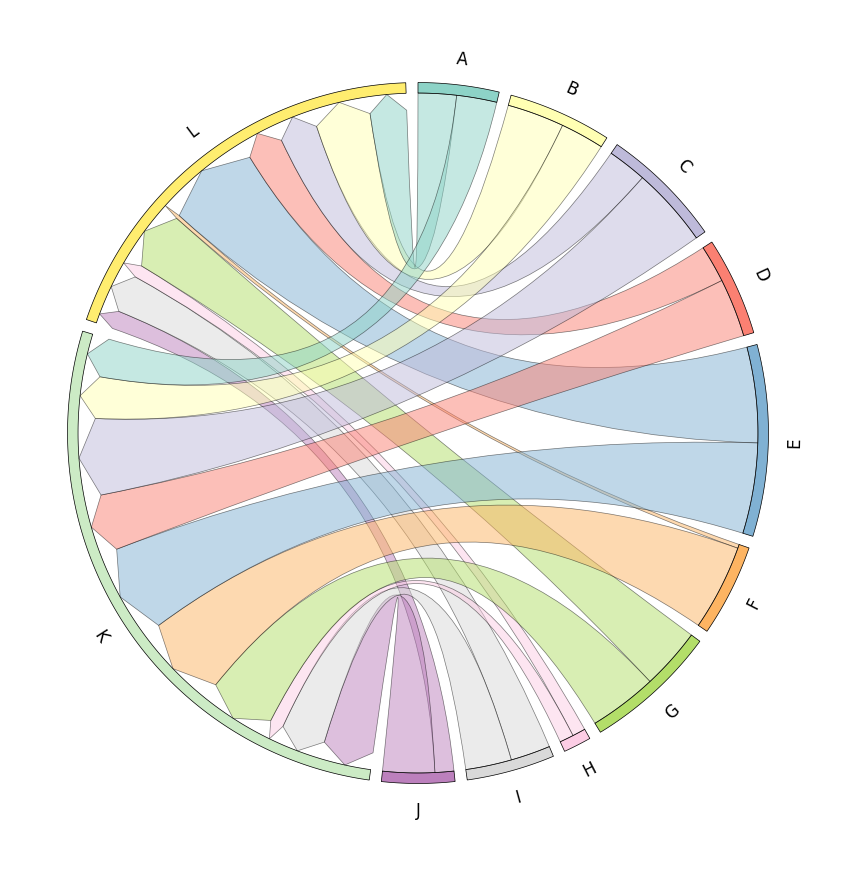

In [4]:
from pycirclize import Circos
from pycirclize.parser import Matrix
from pycirclize.utils import ColorCycler
import pandas as pd

# Create matrix data (10 x 2)
row_names = list("ABCDEFGHIJ")
col_names = list("KL")
matrix_data = [
    [83, 79],
    [90, 118],
    [165, 81],
    [121, 77],
    [187, 197],
    [177, 8],
    [141, 127],
    [29, 27],
    [95, 82],
    [107, 39],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

# Load matrix dataframe (Can also load matrix file)
matrix = Matrix(matrix_df)
ColorCycler.set_cmap("Set3")
name2color = {name: ColorCycler() for name in matrix.all_names}

# Initialize circos sectors
circos = Circos(matrix.to_sectors(), space=2)
for sector in circos.sectors:
    # Plot data axis & text
    track = sector.add_track((97, 100))
    color = name2color[sector.name]
    track.axis(fc=color)
    sector.text(sector.name, size=12)

# Plot links with direction (row -> col)
for link in matrix.to_links():
    row_name = link[0][0]
    color = name2color[row_name]
    circos.link(*link, direction=1, fc=color, ec="black", lw=0.5)

print(matrix)
fig = circos.plotfig()